In [1]:
## step 1: import necessary library
import pandas as pd
import re

# Load the dataset from the specified file path
df = pd.read_csv(r"C:\Users\Acer\Documents\BDA3.3\Customer Churn Prediction\tmobile_reviews.csv")

# Define a function to clean each review
def clean_text(text):
    text = str(text).lower()                         # Convert all text to lowercase
    text = re.sub(r'<.*?>', '', text)                # Remove any HTML tags (if present)
    text = re.sub(r'[^a-z\s]', '', text)             # Remove punctuation, numbers, and special characters
    text = re.sub(r'\s+', ' ', text).strip()         # Remove extra whitespace and strip leading/trailing spaces
    return text

# Apply the cleaning function to the 'review_text' column
df['cleaned_review'] = df['review_text'].apply(clean_text)

# Print the first few rows to compare original and cleaned text
print(df[['review_text', 'cleaned_review']].head())

                                         review_text  \
0  Looks like you’re in Canada.Go to the Canadian...   
1  Companies on Trustpilot can’t offer incentives...   
2  Just cancelled service with T-Mobile last mont...   
3  Stood at T-Mobile in Panama City Beach for 45 ...   
4  I went in to t-mobile Alameda and Wadsworth an...   

                                      cleaned_review  
0  looks like youre in canadago to the canadian t...  
1  companies on trustpilot cant offer incentives ...  
2  just cancelled service with tmobile last month...  
3  stood at tmobile in panama city beach for min ...  
4  i went in to tmobile alameda and wadsworth and...  


In [2]:
### Step 2: Sentiment Analysis with VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score
def get_sentiment_score(text):
    return analyzer.polarity_scores(text)['compound']

# Function to convert score into a label
def get_sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply both functions to your cleaned review column
df['sentiment_score'] = df['cleaned_review'].apply(get_sentiment_score)
df['sentiment_label'] = df['sentiment_score'].apply(get_sentiment_label)

# View the results
print(df[['cleaned_review', 'sentiment_score', 'sentiment_label']].head())

                                      cleaned_review  sentiment_score  \
0  looks like youre in canadago to the canadian t...           0.3612   
1  companies on trustpilot cant offer incentives ...          -0.4700   
2  just cancelled service with tmobile last month...           0.2263   
3  stood at tmobile in panama city beach for min ...           0.0000   
4  i went in to tmobile alameda and wadsworth and...           0.9604   

  sentiment_label  
0        positive  
1        negative  
2        positive  
3         neutral  
4        positive  


In [3]:
# Create word cloud for POSITIVE reviews
positive_text = ' '.join(df[df['sentiment_label'] == 'positive']['cleaned_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Positive Reviews')
plt.show()

NameError: name 'WordCloud' is not defined

In [4]:
# Create word cloud for NEGATIVE reviews
negative_text = ' '.join(df[df['sentiment_label'] == 'negative']['cleaned_review'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Negative Reviews')
plt.show()

NameError: name 'WordCloud' is not defined

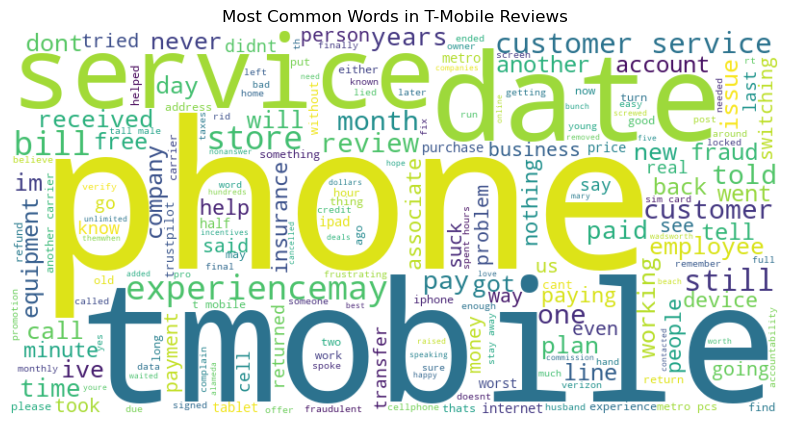

In [5]:
# Import required libraries
from wordcloud import WordCloud      # Used to create the word cloud image
import matplotlib.pyplot as plt      # Used to plot the word cloud

# Step 1: Combine all cleaned reviews into a single string
# This is needed because WordCloud works on one big text blob
all_text = ' '.join(df['cleaned_review'])

# Step 2: Create the WordCloud object
# width and height control the image size, background_color can be customized
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Step 3: Plot the Word Cloud using matplotlib
plt.figure(figsize=(10, 5))                  # Set the figure size
plt.imshow(wordcloud, interpolation='bilinear')  # Render the word cloud
plt.axis('off')                              # Hide axes (no x/y lines)
plt.title('Most Common Words in T-Mobile Reviews')  # Add a title
plt.show()                                   # Show the final image

In [20]:
# Display full positive reviews with high sentiment score
top_reviews = df[df['sentiment_score'] > 0.6][['review_text', 'sentiment_score']]

# Loop through and print each one fully
for i, row in top_reviews.iterrows():
    print(f"\nScore: {row['sentiment_score']}")
    print("Review:")
    print(row['review_text'])


Score: 0.9604
Review:
I went in to t-mobile Alameda and Wadsworth and I had the best customer experience ever. Mary helped me transfer from Verizon to t-mobile. I got into a 16 pro phone with a cool watch phone and payingless then I did with my old service and she did all the transfers easy and I’m so happy with all my devices. Love T-Mobile and there customer service knocks it out of the park ❤️See more

Score: 0.9604
Review:
I went in to t-mobile Alameda and Wadsworth and I had the best customer experience ever. Mary helped me transfer from Verizon to t-mobile. I got into a 16 pro phone with a cool watch phone and paying less then I did with my old service and she did all the transfers easy and I’m so happy with all my devices. Love T-Mobile and there customer service knocks it out of the park ❤️

Score: 0.979
Review:
Since my husband passed in November I have struggled.  He paid all the bills so to remember and also keep track of month/day is not so easy.  And yes, I thought I had 

In [21]:
# Filter for strongly negative reviews (score < -0.6)
negative_reviews = df[df['sentiment_score'] < -0.6][['review_text', 'sentiment_score']]

# Print each full review with its sentiment score
for i, row in negative_reviews.iterrows():
    print(f"\nScore: {row['sentiment_score']}")
    print("Review:")
    print(row['review_text'])


Score: -0.6125
Review:
As soon as T-Mobile gets your money, customer service becomes non-existent. Most of their support is outsourced to Asia, and all you get is double-talk with no real solutions. It's frustrating, repetitive, and leads nowhere. The moment you need real help, you're left on your own.T-Mobile might lure you in with competitive pricing, but don't be fooled — you get exactly what you pay for. If something goes wrong, be prepared for a long, exhausting ride with zero accountability.See more

Score: -0.9461
Review:
on 05-16-25 aprox 5:30 . went to tmobile on rt 44 in new smyrna beach florida. 3 people working there. one was diligently working, other two, Not so much. tall male told me 2 people ahead of me. No problem. waited 10 minutes (mind you only 2 customers in store)  and tall male hols up 1 finger (as in 1 minute) and disappears for 45 minute. Female (red hair) at desk does similar tells me "one minute" and vanishes. other employee still working customers and other

## Score Range	Label	Meaning
>= 0.05	Positive	Customer expresses satisfaction, praise, or good experience
-0.05 to +0.05	Neutral	No strong emotion; review is balanced or vague
<= -0.05	Negative	Customer is complaining, frustrated, or reporting a bad experience

In [22]:
# Count keywords in negative reviews
negative_reviews = df[df['sentiment_label'] == 'negative']['cleaned_review']

# Example: count how many negative reviews mention "bill"
count_bill_issues = negative_reviews.str.contains("bill").sum()
count_cancel_issues = negative_reviews.str.contains("cancel").sum()
count_fraud_issues = negative_reviews.str.contains("fraud").sum()

print("Negative reviews mentioning 'bill':", count_bill_issues)
print("Negative reviews mentioning 'cancel':", count_cancel_issues)
print("Negative reviews mentioning 'fraud':", count_fraud_issues)

Negative reviews mentioning 'bill': 5
Negative reviews mentioning 'cancel': 2
Negative reviews mentioning 'fraud': 3


In [6]:
# Filter positive reviews
positive_reviews = df[df['sentiment_label'] == 'positive']['cleaned_review']

# Count appreciative keywords
count_support_praise = positive_reviews.str.contains("support").sum()
count_service_praise = positive_reviews.str.contains("service").sum()
count_price_praise = positive_reviews.str.contains("price").sum()
count_speed_praise = positive_reviews.str.contains("speed").sum()
count_friendly = positive_reviews.str.contains("friendly").sum()

# Output
print("Positive reviews mentioning 'support':", count_support_praise)
print("Positive reviews mentioning 'service':", count_service_praise)
print("Positive reviews mentioning 'price':", count_price_praise)
print("Positive reviews mentioning 'speed':", count_speed_praise)
print("Positive reviews mentioning 'friendly':", count_friendly)

Positive reviews mentioning 'support': 0
Positive reviews mentioning 'service': 6
Positive reviews mentioning 'price': 2
Positive reviews mentioning 'speed': 0
Positive reviews mentioning 'friendly': 0
